webf NOT subset; don't know how to subset; dropped
webf NOT subset; don't know how to subset; dropped


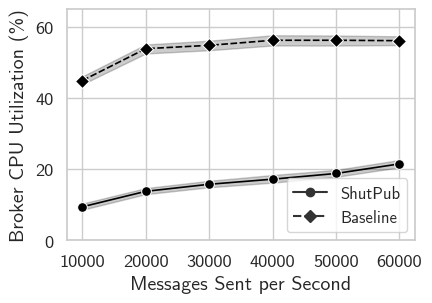

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.signal import find_peaks
import seaborn as sns

sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif', rc={'figure.figsize':(4.5,3)})
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.dpi'] = 100
rcParams['axes.unicode_minus'] = False
file_set = {
    # 70000:[
    #     '/Users/minghe/Desktop/0911terraform/broker/70000.csv',
    # ],
    # "mi20"
    60000:[
        './log/0911terraform/broker/baseline_60000.csv',
        'log/0911terraform/broker/60000.csv',
    ],
    # "mi20"
    #PSF_PRODUCER_NUM="100" PSF_MESSAGE_NUM="20000" PSF_MESSAGE_INTERVAL="20" PSF_PUB_WAIT_TIME="10000"
    50000:[
        'log/0911terraform/broker/mi20.csv',
        'log/0911terraform/broker/baseline_mi20.csv',
    ],


    # "mi25"
    40000:[
        'log/0911terraform/broker/mi25.csv',
        'log/0911terraform/broker/baseline_mi25.csv'

    ],

    # "mi33"
    30000:[
        'log/0911terraform/broker/mi33.csv',
        'log/0911terraform/broker/baseline_mi33.csv'

    ],
    # "mi50"
    20000:[
        'log/0911terraform/broker/mi50.csv',
        'log/0911terraform/broker/baseline_mi50.csv'

    ],

    # "mi100"
    10000:[
        'log/0911terraform/broker/mi100.csv',
        'log/0911terraform/broker/baseline_mi100.csv'

    ],
}

dfs = []

for mi, file_paths in file_set.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        mi_broker = df.copy()
        mi_broker['timestamp'] = mi_broker['Unix Time'] - mi_broker['Unix Time'][0]
        mi_broker['messageInterval'] = mi

        if "baseline" in file_path:
            mi_broker['type'] = "baseline"
        else:
            mi_broker['type'] = "psf"

        dfs.append(mi_broker)

merged_df = pd.concat(dfs)

g = sns.lineplot(data=merged_df, x='messageInterval', y='CPU Utilization (%)', style_order=['psf', 'baseline'], hue_order=['psf', 'baseline'], markers=["o", "D"], style='type', errorbar=("ci",95),color='black', markersize=7, linewidth=1.2)
#g.set_xticks([500, 1000, 2000, 3330, 5000])

# g.set_title("Broker Strain with Message Frequency", fontsize=26)

g.set_xlabel('Messages Sent per Second')
g.set_ylabel('Broker CPU Utilization (%)')

g.set_ylim(0,65)

legend= plt.legend(loc='lower right', fontsize='small')
legend_labels = legend.texts

for label in legend_labels:
    if label.get_text() == 'psf':
        label.set_text('ShutPub')
    if label.get_text() == 'baseline':
        label.set_text('Baseline')

    plt.savefig('broker_strain_lineplot_10000_60000.pdf', bbox_inches='tight')

# merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==40000]['RAM Utilization (%)'].describe()


In [3]:
merged_df.dtypes

Time                    object
Unix Time                int64
CPU Utilization (%)    float64
RAM Utilization (%)    float64
timestamp                int64
messageInterval          int64
type                    object
dtype: object

In [2]:
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==60000]['CPU Utilization (%)'].describe()


count    296.000000
mean      21.484155
std        9.056899
min        0.000000
25%       19.170000
50%       20.810000
75%       22.280000
max       98.020000
Name: CPU Utilization (%), dtype: float64

In [ ]:
merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==10000]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      44.935831
# std       10.386914
# min        0.000000
# 25%       43.590000
# 50%       45.050000
# 75%       46.685000
# max      100.000000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==20000]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      53.907492
# std       11.428125
# min        0.000000
# 25%       52.550000
# 50%       54.310000
# 75%       56.000000
# max      100.000000


merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==30000]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      54.844203
# std       11.705878
# min        0.000000
# 25%       53.480000
# 50%       54.970000
# 75%       57.070000
# max      100.000000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==50000]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      56.276373
# std       12.369701
# min        0.000000
# 25%       55.210000
# 50%       56.700000
# 75%       57.935000
# max      100.000000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==40000]['CPU Utilization (%)'].describe()
# count    294.000000
# mean      56.270068
# std       12.650654
# min        0.000000
# 25%       55.330000
# 50%       56.480000
# 75%       58.320000
# max      100.000000

merged_df[merged_df['type'] == 'baseline'][merged_df[merged_df['type'] == 'baseline']['messageInterval']==60000]['CPU Utilization (%)'].describe()
# count    295.000000
# mean      56.152915
# std       10.953111
# min        0.000000
# 25%       54.220000
# 50%       55.840000
# 75%       57.140000
# max      100.000000

In [11]:
merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==70000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      23.549459
# std        9.514659
# min        0.000000
# 25%       21.002500
# 50%       22.555000
# 75%       24.660000
# max       96.000000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==60000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      21.484155
# std        9.056899
# min        0.000000
# 25%       19.170000
# 50%       20.810000
# 75%       22.280000
# max       98.020000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==50000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      18.789899
# std        8.862398
# min        0.000000
# 25%       17.010000
# 50%       18.460000
# 75%       20.125000
# max      100.000000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==40000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      17.183378
# std        9.074165
# min        0.000000
# 25%       15.380000
# 50%       16.750000
# 75%       18.320000
# max      100.000000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==30000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      15.751723
# std        8.477899
# min        0.000000
# 25%       13.780000
# 50%       15.080000
# 75%       16.180000
# max       99.500000


merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==20000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean      13.765068
# std        8.000772
# min        0.000000
# 25%       11.790000
# 50%       13.000000
# 75%       14.000000
# max       87.940000

merged_df[merged_df['type'] == 'psf'][merged_df[merged_df['type'] == 'psf']['messageInterval']==10000]['CPU Utilization (%)'].describe()
# count    296.000000
# mean       9.414088
# std        8.162944
# min        0.000000
# 25%        7.140000
# 50%        8.460000
# 75%        9.410000
# max       87.620000

SyntaxError: invalid syntax (2412416502.py, line 43)